In [2]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd  # to store tabular data
import numpy as np  # to do some math
import matplotlib.pyplot as plt  # a popular data visualization tool
import seaborn as sns  # another popular data visualization tool
%matplotlib inline  
plt.style.use('fivethirtyeight')  # a popular data visualization theme

# Salary Ranges Dataset:

In [3]:
# load in the data set
salary_ranges = pd.read_csv('../data/Salary_Ranges_by_Job_Classification.csv')

In [4]:
# view the first few rows and the headers
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [5]:
# get a sense of how many rows of data there are, if there are any missing values, and what data type each column has
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SetID               1356 non-null   object
 1   Job Code            1356 non-null   object
 2   Eff Date            1356 non-null   object
 3   Sal End Date        1356 non-null   object
 4   Salary SetID        1356 non-null   object
 5   Sal Plan            1356 non-null   object
 6   Grade               1356 non-null   object
 7   Step                1356 non-null   int64 
 8   Biweekly High Rate  1356 non-null   object
 9   Biweekly Low Rate   1356 non-null   object
 10  Union Code          1356 non-null   int64 
 11  Extended Step       1356 non-null   int64 
 12  Pay Type            1356 non-null   object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [6]:
# another method to check for missing values
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [7]:
salary_ranges

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,COMMN,7412,05/15/2010 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,06470,1,$2145.00,$2607.00,200,0,B
1352,COMMN,8126,05/15/2010 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,07185,1,$3041.00,$3696.00,200,0,B
1353,COMMN,9155,05/15/2010 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,07245,1,$3132.00,$3807.00,200,0,B
1354,COMMN,9156,05/15/2010 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,07445,1,$3453.00,$4197.00,200,0,B


In [8]:
# Basic Value Counts of the Grade column
salary_ranges['Grade'].value_counts().head()

00000    61
07450    12
06870     9
07420     9
07170     9
Name: Grade, dtype: int64

<AxesSubplot:>

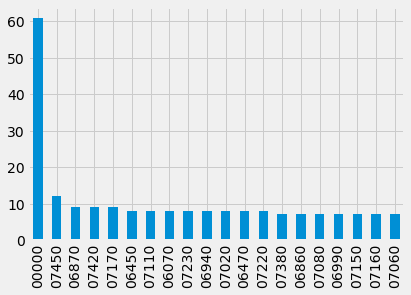

In [9]:
# Bar Chart of the Grade column
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

<AxesSubplot:ylabel='Grade'>

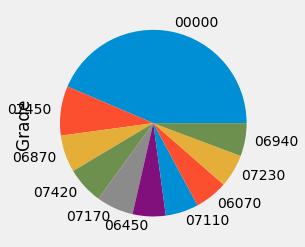

In [10]:
# Bar Chart of the Grade column as a pie chart (top 5 values only)
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie')

<AxesSubplot:>

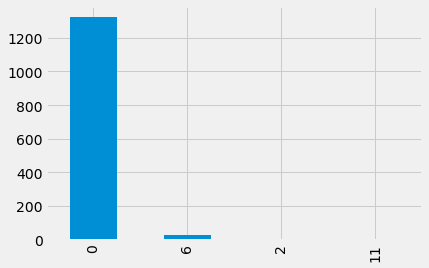

In [11]:
salary_ranges['Extended Step'].value_counts().plot(kind='bar')

In [12]:
# show descriptive stats:
salary_ranges.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [13]:
salary_ranges = salary_ranges[['Biweekly High Rate', 'Grade']]

salary_ranges.head(5)

,Biweekly High Rate,Grade
0,$0.00,00000
1,$15.00,00000
2,$25.00,00000
3,$50.00,00000
4,$100.00,00000


In [14]:
# Rate has dollar signs in a few of them, we need to clean that up..
salary_ranges['Biweekly High Rate'].describe()

count         1356
unique         593
top       $3460.00
freq            12
Name: Biweekly High Rate, dtype: object

In [15]:
salary_ranges['Biweekly High Rate'].map(lambda value: value.replace('$',''))

0          0.00
1         15.00
2         25.00
3         50.00
4        100.00
         ...   
1351    2145.00
1352    3041.00
1353    3132.00
1354    3453.00
1355    3453.00
Name: Biweekly High Rate, Length: 1356, dtype: object

In [16]:
salary_ranges['Biweekly High Rate'].apply(lambda value: value.replace('$',''))

0          0.00
1         15.00
2         25.00
3         50.00
4        100.00
         ...   
1351    2145.00
1352    3041.00
1353    3132.00
1354    3453.00
1355    3453.00
Name: Biweekly High Rate, Length: 1356, dtype: object

In [17]:
# need to clean our Biweekly High columns to remove the dollar sign in order to visualize
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].map(lambda value: value.replace('$',''))

C:\Users\user\AppData\Local\Temp/ipykernel_11820/1133670070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].map(lambda value: value.replace('$',''))


In [18]:
# Check to see the '$' has been removed
salary_ranges.head()

,Biweekly High Rate,Grade
0,0.00,00000
1,15.00,00000
2,25.00,00000
3,50.00,00000
4,100.00,00000


In [19]:
# Convert the Biweeky columns to float
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)

C:\Users\user\AppData\Local\Temp/ipykernel_11820/2489328889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)


In [20]:
# Convert the Grade columns to str
salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)

C:\Users\user\AppData\Local\Temp/ipykernel_11820/1747352195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)


In [21]:
# check to see if converting the data types worked
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Biweekly High Rate  1356 non-null   float64
 1   Grade               1356 non-null   object 
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


In [22]:
salary_ranges.describe()

,Biweekly High Rate
count,1356.000000
mean,3161.727021
std,1481.002904
min,0.000000
25%,2145.000000
50%,2856.500000
75%,3703.000000
max,12120.770000


In [23]:
# Which Grade has the highest Biweekly high rate
# What is the average rate across all of the Grades

Text(0.5, 1.0, 'Top 20 Grade by Mean Biweekly High Rate')

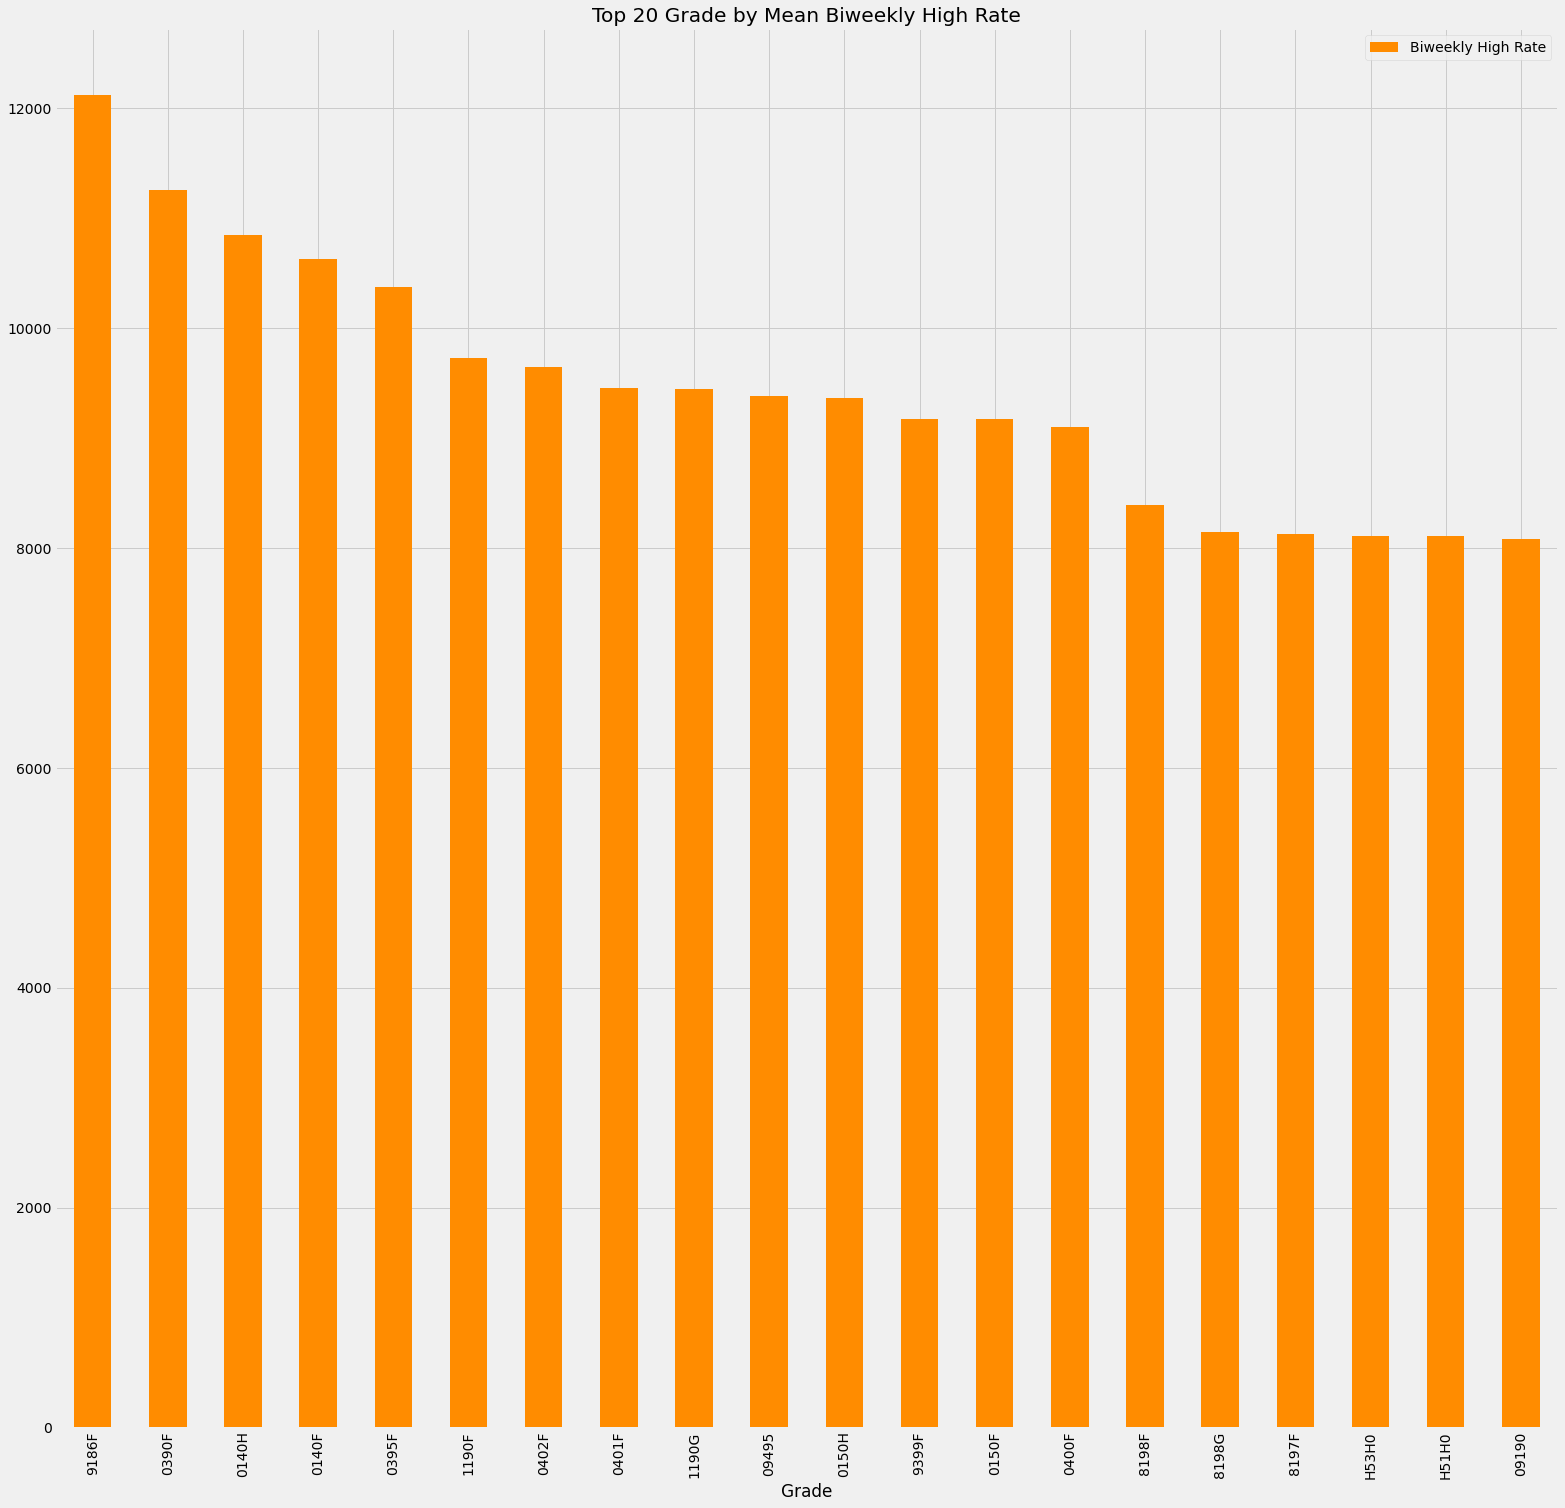

In [24]:
# Highest Salary
fig, ax = plt.subplots(figsize=(24,24))
salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Mean Biweekly High Rate')

Text(0.5, 1.0, 'Top 20 Grade by Mean Biweekly High Rate')

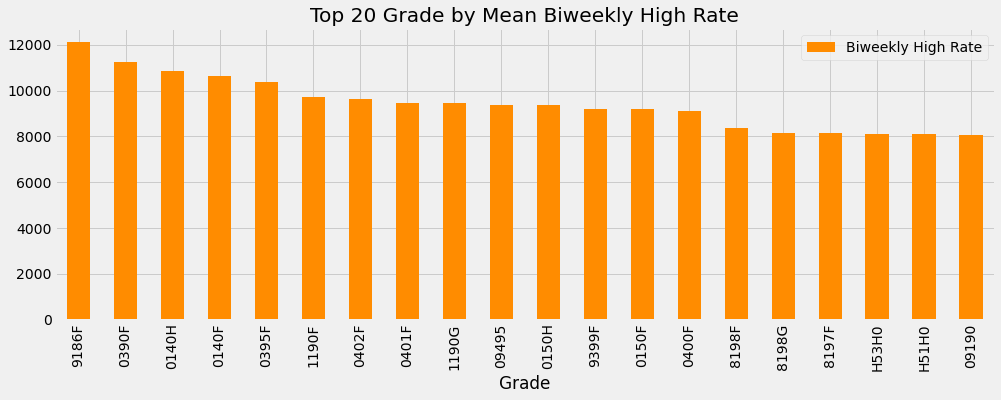

In [25]:
# Which Grade has the highest Biweekly high rate
# What is the average rate across all of the Grades

fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Mean Biweekly High Rate')

Text(0.5, 1.0, 'Bottom 20 Grade by Mean Biweekly High Rate')

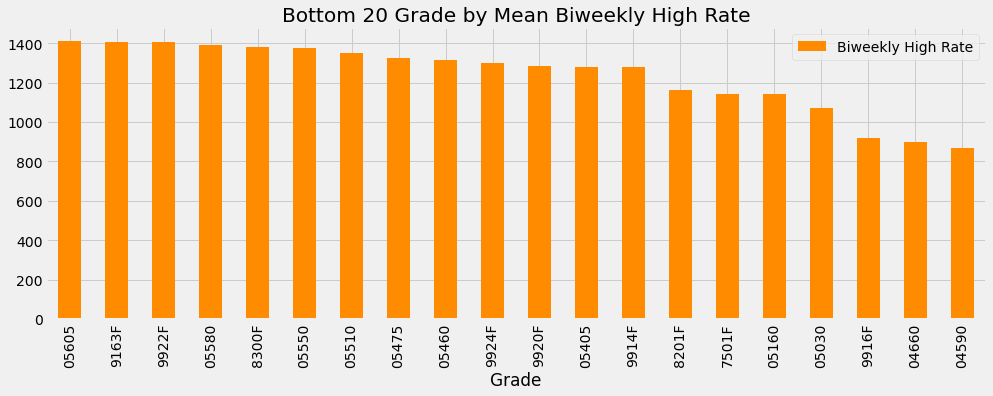

In [26]:
# Which Grade has the lowest Biweekly high rate

fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).tail(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Bottom 20 Grade by Mean Biweekly High Rate')

In [27]:
sorted_df = salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False)
sorted_df.iloc[0][0] / sorted_df.iloc[-1][0]

13.931919540229886

# Further plotting: 

Only using Biweekly High rate since they are the same as Low rate

# SFO Customer Survey Dataset:

In [30]:
# load in the data set
customer = pd.read_csv('../data/2013_SFO_Customer_survey.csv')

In [31]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RESPNUM          3535 non-null   int64  
 1   CCGID            3535 non-null   object 
 2   RUN              3535 non-null   int64  
 3   INTDATE          3535 non-null   int64  
 4   GATE             3535 non-null   int64  
 5   STRATA           3535 non-null   int64  
 6   PEAK             3535 non-null   int64  
 7   METHOD           3535 non-null   int64  
 8   AIRLINE          3535 non-null   int64  
 9   FLIGHT           3535 non-null   int64  
 10  DEST             3535 non-null   int64  
 11  DESTGEO          3535 non-null   int64  
 12  DESTMARK         3535 non-null   int64  
 13  ARRTIME          3535 non-null   object 
 14  DEPTIME          3535 non-null   object 
 15  Q2PURP1          3535 non-null   int64  
 16  Q2PURP2          3459 non-null   float64
 17  Q2PURP3       

In [32]:
customer.shape

(3535, 95)

In [33]:
art_ratings = customer['Q7A_ART']

In [34]:
art_ratings.describe()  # it considers the ratings numerical, so let's cast them as a string because we know that they are ordinal

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

In [35]:
# only consider ratings 1-5
art_ratings = art_ratings[(art_ratings >=1) & (art_ratings <=5)]

In [36]:
# cast the values as strings
art_ratings = art_ratings.astype(str)

In [37]:
art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

<AxesSubplot:ylabel='Q7A_ART'>

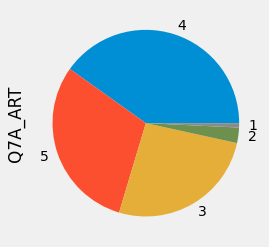

In [38]:
# Can use pie charts, just like in nominal level
art_ratings.value_counts().plot(kind='pie')

<AxesSubplot:>

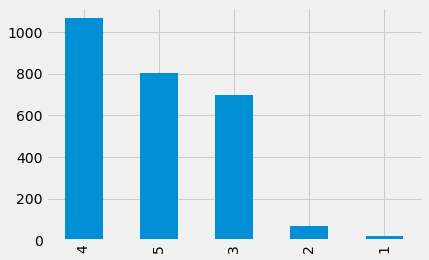

In [39]:
# Can use bar charts, just like in nominal level
art_ratings.value_counts().plot(kind='bar')

<AxesSubplot:>

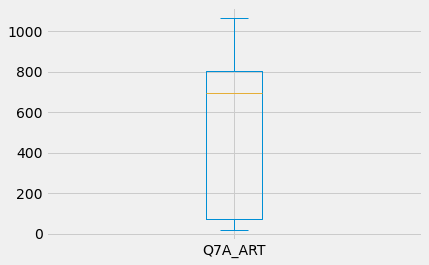

In [40]:
# Boxplots are available at the ordinal level
art_ratings.value_counts().plot(kind='box')

In [41]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RESPNUM          3535 non-null   int64  
 1   CCGID            3535 non-null   object 
 2   RUN              3535 non-null   int64  
 3   INTDATE          3535 non-null   int64  
 4   GATE             3535 non-null   int64  
 5   STRATA           3535 non-null   int64  
 6   PEAK             3535 non-null   int64  
 7   METHOD           3535 non-null   int64  
 8   AIRLINE          3535 non-null   int64  
 9   FLIGHT           3535 non-null   int64  
 10  DEST             3535 non-null   int64  
 11  DESTGEO          3535 non-null   int64  
 12  DESTMARK         3535 non-null   int64  
 13  ARRTIME          3535 non-null   object 
 14  DEPTIME          3535 non-null   object 
 15  Q2PURP1          3535 non-null   int64  
 16  Q2PURP2          3459 non-null   float64
 17  Q2PURP3       

In [42]:
customer.isnull().sum()

RESPNUM        0
CCGID          0
RUN            0
INTDATE        0
GATE           0
              ..
Q21_HIFLYER    0
Q22A_USESJC    0
Q22B_USEOAK    0
LANG           0
WEIGHT         0
Length: 95, dtype: int64

<AxesSubplot:>

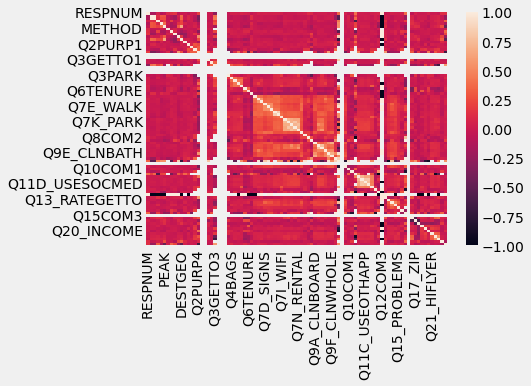

In [43]:
sns.heatmap(customer.corr())

In [44]:
# we see that there are quite a few null values, so let's discuss methods for handling missing data
# other methods to handle missing data, (called imputing): 
# using the mean of the column for the missing values,
# utilizing machine learning methods to fill in the data

In [45]:
# here we will remove the columns that contain those missing values for now
customer.dropna(axis=1, inplace=True)

In [46]:
customer.isnull().sum()

RESPNUM        0
CCGID          0
RUN            0
INTDATE        0
GATE           0
              ..
Q21_HIFLYER    0
Q22A_USESJC    0
Q22B_USEOAK    0
LANG           0
WEIGHT         0
Length: 66, dtype: int64

In [47]:
# Columns with null values got dropped (went from 95 columns to 66)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 66 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RESPNUM          3535 non-null   int64  
 1   CCGID            3535 non-null   object 
 2   RUN              3535 non-null   int64  
 3   INTDATE          3535 non-null   int64  
 4   GATE             3535 non-null   int64  
 5   STRATA           3535 non-null   int64  
 6   PEAK             3535 non-null   int64  
 7   METHOD           3535 non-null   int64  
 8   AIRLINE          3535 non-null   int64  
 9   FLIGHT           3535 non-null   int64  
 10  DEST             3535 non-null   int64  
 11  DESTGEO          3535 non-null   int64  
 12  DESTMARK         3535 non-null   int64  
 13  ARRTIME          3535 non-null   object 
 14  DEPTIME          3535 non-null   object 
 15  Q2PURP1          3535 non-null   int64  
 16  Q3GETTO1         3535 non-null   int64  
 17  Q4BAGS        

In [48]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
RESPNUM,3535.0,2119.889392,1385.474407,1.000000,886.500000,2137.000000,3168.500000,9995.000000
RUN,3535.0,1960.375389,458.893056,1201.000000,1605.500000,1918.000000,2403.000000,2806.000000
INTDATE,3535.0,9.431966,4.561762,2.000000,6.000000,9.000000,14.000000,18.000000
GATE,3535.0,52.635078,34.075357,1.000000,21.000000,52.000000,87.000000,102.000000
STRATA,3535.0,1.977652,0.778393,1.000000,1.000000,2.000000,3.000000,3.000000
...,...,...,...,...,...,...,...,...
Q21_HIFLYER,3535.0,1.837058,0.596193,0.000000,2.000000,2.000000,2.000000,4.000000
Q22A_USESJC,3535.0,1.718812,0.584292,0.000000,2.000000,2.000000,2.000000,4.000000
Q22B_USEOAK,3535.0,1.663932,0.612257,0.000000,1.000000,2.000000,2.000000,4.000000
LANG,3535.0,1.159264,0.628356,1.000000,1.000000,1.000000,1.000000,4.000000


<AxesSubplot:>

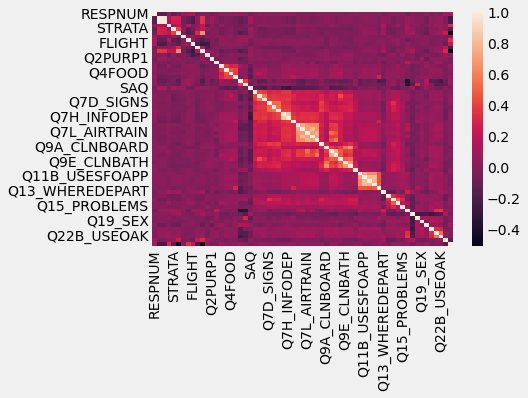

In [49]:
sns.heatmap(customer.corr())

# Chicago Food Inspections Data

In [51]:
# load in the data set
food = pd.read_csv('../data/Food_Inspections.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/Food_Inspections.csv'

In [ ]:
food.info()

In [ ]:
food.isnull().sum()

In [ ]:
food.head(2)

In [ ]:
food['Results'].unique()

In [ ]:
food['Risk'].unique()

This dataset is a good example of descriptive data:
Understanding the type of data that we are working with will give us a better idea of what type of ML model to impelement.

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Risk')[['Zip']].count().sort_values(
    'Zip', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Number of Zipcodes by Risk')

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Inspection Type')[['Risk']].count().sort_values(
    'Risk', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Risk by Inspection Type')

In [ ]:
# Clean risk to numeric values

In [ ]:
food['Risk'] = food['Risk'].astype(str)

In [ ]:
food['Risk'] = food['Risk'].map(lambda value: value.replace('Risk', '').replace('(High)', '').replace('(Low)', '').replace('(Medium)', '').replace('All', '0').replace('nan', '0'))

In [ ]:
food['Risk'] = food['Risk'].astype(int)

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Inspection Type')[['Risk']].mean().sort_values(
    'Risk', ascending=False).head(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Mean Risk by Inspection Type')

# Whitehouse Visitor Log Dataset

In [ ]:
# load in the data set
whitehouse = pd.read_csv('/Users/divyasusarla/Downloads/whitehouse_waves-2016_12.csv')

In [ ]:
whitehouse.info()

In [ ]:
whitehouse.isnull().sum()

In [ ]:
whitehouse.dropna(axis=1, inplace=True)

In [ ]:
whitehouse.head()

In [ ]:
whitehouse['APPT_START_DATE'] = pd.to_datetime(whitehouse['APPT_START_DATE'])
whitehouse['APPT_END_DATE'] = pd.to_datetime(whitehouse['APPT_END_DATE'])

In [ ]:
whitehouse['APPT_DURATION'] = whitehouse['APPT_END_DATE'] - whitehouse['APPT_START_DATE']

In [ ]:
np.mean(whitehouse['APPT_DURATION'])

# Climate Change Dataset:

In [ ]:
# load in the data set
climate = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [ ]:
climate.head()

In [ ]:
climate.info()

In [ ]:
climate.isnull().sum()

In [ ]:
# remove missing values
climate.dropna(axis=0, inplace=True)

In [ ]:
climate.head()

In [ ]:
# remove the "N" and "S" from Latitude
climate['Latitude'] = climate['Latitude'].map(lambda value: value.replace('N', '').replace('S', ''))

In [ ]:
# remove the "W" and "E" from Longitude
climate['Longitude'] = climate['Longitude'].map(lambda value: value.replace('E', '').replace('W', ''))

In [ ]:
# Cast Longitude as a float
climate['Longitude'] = climate['Longitude'].astype(float)

In [ ]:
# Cast Latitude as a float
climate['Latitude'] = climate['Latitude'].astype(float)

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

climate.groupby('Country')[['AverageTemperature']].max().sort_values(
    'AverageTemperature', ascending=False).head(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max Avg Temp by Country')

In [ ]:
# Convert the dt column to datetime and extract the year
climate['dt'] = pd.to_datetime(climate['dt'])
climate['year'] = climate['dt'].map(lambda value: value.year)

In [ ]:
climate.head()

In [ ]:
climate['AverageTemperature'].nunique()

In [ ]:
climate['AverageTemperature'].hist()

In [ ]:
climate['AverageTemperature'].describe()

In [ ]:
# Raw scatterplot to show average temperatures in the world

x = climate['year']
y = climate['AverageTemperature']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

In [ ]:
# Oof, how about a subset the data to just the US?
climate_sub_us = climate.loc[climate['Country'] == 'United States']

In [ ]:
climate_sub_us['century'] = climate_sub_us['year'].map(lambda x: x/100+1)

In [ ]:
climate_sub_us['AverageTemperature'].hist(by=climate_sub_us['century'], 
                                          sharex=True, sharey=True, 
                                          figsize=(10, 10), 
                                          bins=20)

In [ ]:
climate_sub_us.groupby('century')['AverageTemperature'].mean().plot(kind='line')

In [ ]:
century_changes = climate_sub_us.groupby('century')['AverageTemperature'].mean()

# 21st century average temp in US minus 18th century average temp in US
century_changes[21] - century_changes[18]  

In [ ]:
century_changes

In [ ]:
x = climate_sub_us['year']
y = climate_sub_us['AverageTemperature']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

In [ ]:
# Not much better, Let's use a groupby to reduce the amount of noise in the US
climate_sub_us.groupby('year').mean()['AverageTemperature'].plot()

In [ ]:
# And a moving average to smooth it all out:
climate_sub_us.groupby('year').mean()['AverageTemperature'].rolling(10).mean().plot()

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

climate_sub_us.groupby('City')[['AverageTemperature']].max().sort_values(
    'AverageTemperature', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max Avg Temp by US City')